**INSTALLING THE REQ LIB**

In [ ]:
# diffusion is a interface that is used to access the diffusion model from hugging face
# it uses hybrid architecture (NLP - for understanding text) (CV - for generation of images)
!pip install transformers diffusers accelerate

In [ ]:
from diffusers import StableDiffusionPipeline # pipeline for diffusers
import matplotlib.pyplot as plt
import torch

**SELECTING AND LOADING THE MODEL INTO GPU**

In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_auth_token=True).to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
prompt = input("Enter the prompt: ")


Enter the prompt: a fluffy white Persian cat with emerald green eyes, curled up on a velvet armchair, lit by warm afternoon sunlight streaming through a lace curtain


  0%|          | 0/50 [00:00<?, ?it/s]

PROMPT :  a fluffy white Persian cat with emerald green eyes, curled up on a velvet armchair, lit by warm afternoon sunlight streaming through a lace curtain


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

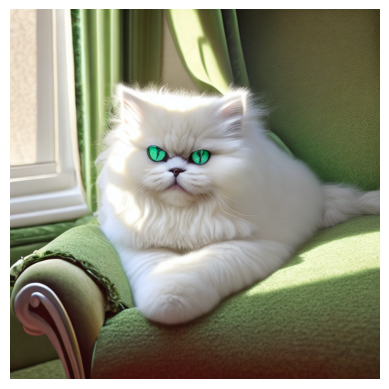

In [ ]:
image = pipe(prompt).images[0]
print("PROMPT : ", prompt)
plt.imshow(image)
plt.axis("off")

**WORKING WITH STABLE DIFFUSION PARAMETERS**

  0%|          | 0/50 [00:00<?, ?it/s]

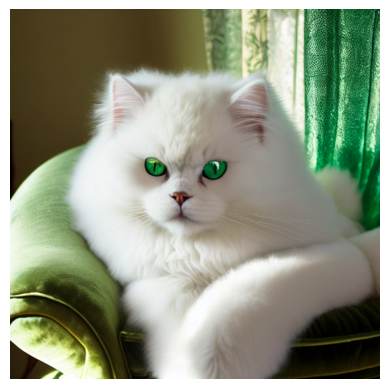

In [ ]:
# general class for all inputs
def generate_image(pipe, prompt, parameters):
  img = pipe(prompt, **parameters).images[0]
  plt.imshow(img)
  plt.axis("off")

parameters = {}
generate_image(pipe,prompt,parameters)

  0%|          | 0/100 [00:00<?, ?it/s]

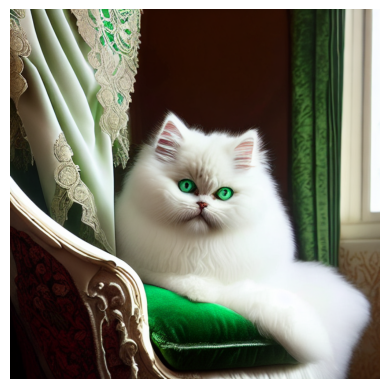

In [ ]:
# 1) NUM INFERENCE STEP'S (NUMBER OF ITERATIVE DENOISING STEPS PERFORMED TO GENERATE AN IMAGE)
parameters = {"num_inference_steps" : 100}
generate_image(pipe,prompt,parameters)

  0%|          | 0/100 [00:00<?, ?it/s]

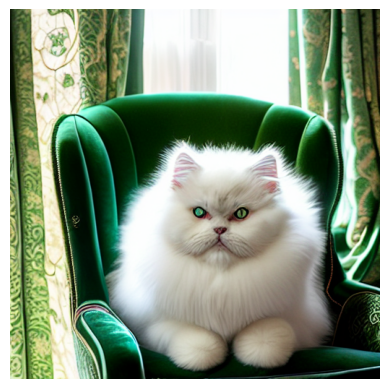

In [ ]:
# 2) height width ( to set the height and width of the image)
parameters = {"num_inference_steps" : 100,"height" : 512, "width" : 512}
generate_image(pipe,prompt,parameters)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `__iter__` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access '__iter__' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


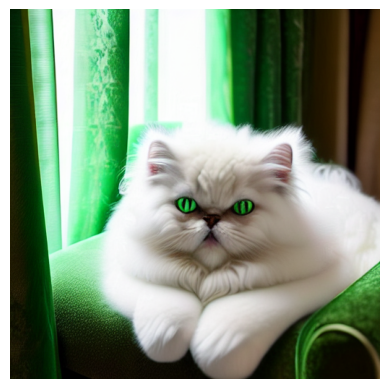

In [ ]:
# 3) NUMBER OF IMAGES PER PROMPT
parameters = {"num_inference_steps" : 100,"height" : 512, "width" : 512, "num_images_per_prompt" : 1}
generate_image(pipe,prompt,parameters)

You can save the loaded pipeline to a local directory using the `save_pretrained()` method. This will save all the components of the pipeline (tokenizer, scheduler, unet, etc.) to the specified path.

  0%|          | 0/100 [00:00<?, ?it/s]

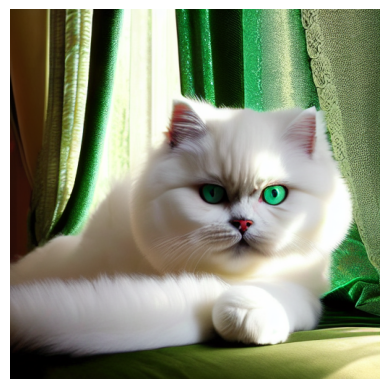

In [ ]:
# NEGATIVE PROMPT
parameters = {"num_inference_steps" : 100,"height" : 512, "width" : 512, "num_images_per_prompt" : 4, "negative_prompt" : "blurry"}
generate_image(pipe,prompt,parameters)

In [ ]:
save_directory = "./dreamlike-diffusion-pipeline"
pipe.save_pretrained(save_directory)